In [1]:
from NeuralNetworks import *
from CNN import *
from UNET import test_unet_code
from DeepLabV3Plus_Tensorflow import test_tensorflow_DeepLabv3_code
from MLModels import *

2022-05-06 09:19:31.914729: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-06 09:19:31.914762: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Linear Regression

In [2]:
reg = LinearRegression()

x = np.array([[1,2,3],[0,1,1],[1,1,0],[1,0,1]]) # Dummy X_train
y = np.array([2.4,5.6,2.3,2.7]) # Dummy Y_train

model = LinearRegression()
model.fit(x,y)
print('Loss: ',model.loss) # Loss after final iteration

print("Y_hat: ",model.predict(np.array([1,2,3]))) # Dummy X_test

Loss:  3.6251979825350213
Y_hat:  4.109356342638097


# Logistic Regression

Specifically, the KL divergence measures a very similar quantity to cross-entropy. It measures the average number of extra bits required to represent a message with Q instead of P, not the total number of bits.

If two probability distributions are the same, then the cross-entropy between them will be the entropy of the distribution.

[All about Cross Entropy, Entropy, Kl-Divergence, Log Loss](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

**Log loss = negative log-likelihood (under a Bernoulli probability distribution)**

`Cross_Entropy(Y,Y_hat) = Log_Loss(Y,Y_hat) = Entropy(Y) + KL_Divergence(Y,Y_hat)`

`Cross_Entropy(Y,Y_hat) != Cross_Entropy(Y_hat,Y)`

In [3]:
cla = LogisticRegression()
y = np.array([1,0,0,1])
cla.fit(x,y)

print(cla.loss)

prob, cla = cla.predict(np.array([1,2,3]))
print(cla)

1.0852763569399853
1


# PCA

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA as PCA_sk

iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
X = StandardScaler().fit_transform(X)

pca = PCA(4)
pca.fit(X,transform=True)[:3]

array([[-2.26470281, -0.4800266 , -0.12770602,  0.0241682 ],
       [-2.08096115,  0.67413356, -0.23460885,  0.10300677],
       [-2.36422905,  0.34190802,  0.04420148,  0.02837705]])

In [5]:
pca_sk = PCA_sk(4,random_state=13)
pca_sk.fit_transform(X)[:3]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705]])

In [6]:
x_test = np.array([[-0.4,1.6,-0.3,1.3]])
pca.transform(x_test)

array([[-0.07919271, -1.40598311,  1.46075404,  0.61898115]])

In [7]:
pca_sk.transform(x_test)

array([[-0.07919271,  1.40598311,  1.46075404, -0.61898115]])

# KNN

In [2]:
knn = KNN(k=3)
x = np.array([[1,2,3],[3,4,5],[0,1,0]]) # Dummy X features
y = np.array([0,1,0])
x_test = np.array([[2,3,4]])

knn.fit(x,y)
knn.predict(x_test)

array([0])

# Bayes Classifier

In [7]:
y = np.array([0,1,2,0,0,1,2,3])
X = np.random.rand(8,10)
bayes = BayesClassifier()
bayes.fit(X,y)
bayes.predict(X)

[0, 1, 2, 1, 0, 1, 2, 3]

In [15]:
y = [1,1,1,1,0,2,2,2,2,2,0,0]
np.bincount(y)/len(y)

array([0.25      , 0.33333333, 0.41666667])

# NN

In [36]:
X, y = spiral_data(samples = 100 , classes = 3)
dense1  = Dense(2, 3 )
activation1 = ReLu()
dense2 = Dense(3 , 3 )
activation2 = Softmax()
loss_function = CategoricalCrossEntropy() 
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5])
loss = loss_function.average_loss(activation2.output, y)
print('loss:', loss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333325 0.33333337]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
loss: 1.0986105


# ---------------------------------------------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


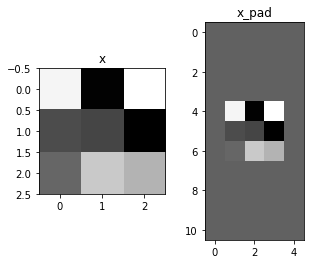

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)
x = np.random.randn(4, 3, 3, 3)
x_pad = add_padding(x,(4,1),0)


fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])



# UNET: `PyTorch`

In [3]:
test_unet_code()

Input Shape: torch.Size([1, 1, 572, 572]) || Output Shape: torch.Size([1, 2, 388, 388])
Code Running Perfectly


# Deeplab V3 Plus : `Tensorflow 2.x`

In [ ]:
test_tensorflow_DeepLabv3_code()

# SVM

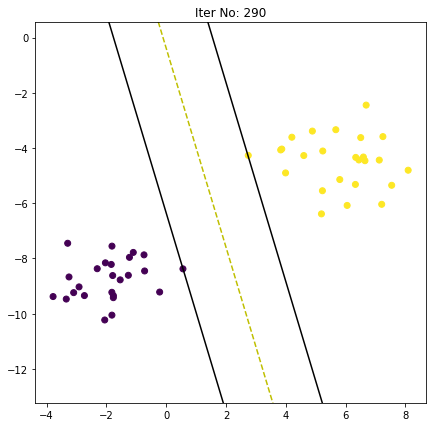

In [3]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)


clf = SVM()
clf.fit(X,y, visualise = True)

# K Means Clustering

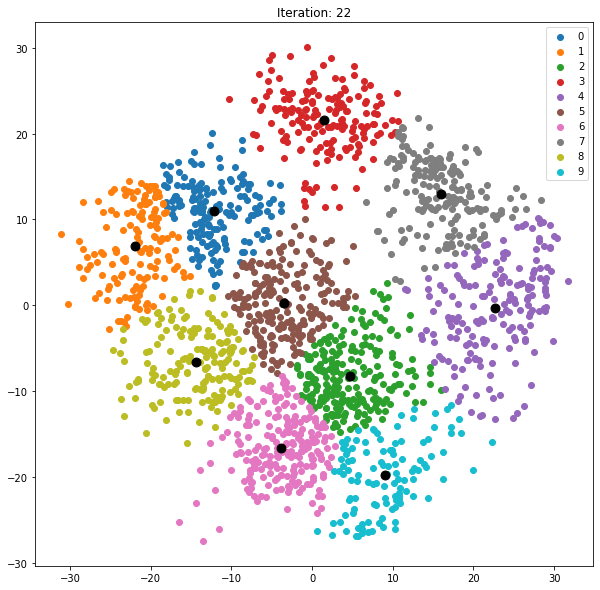

Converged


In [35]:
data = load_digits().data
data = sk_PCA(2).fit_transform(data)
km = KMeansClustering(K = 10, max_iter = 300)
labels = km.fit_predict(data, visualise = True) 